# EDA Analysis

Droping columns with more than 50% of missing data

Imputing missing values for both ccategoricalk and numerical columns

In [54]:
#Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [55]:
def wrangle(filename):
    df = pd.read_csv(filename)

    return df

In [56]:
df = wrangle(r"C:\Users\User\Desktop\projectComplete\titanicEDA\titanic.csv")

#### To inspect te dataset

In [57]:
df.shape

(891, 12)

In [58]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [71]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [72]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [51]:
# function for clean dataset and handle missing values
def clean_dataset(df, missing_threshold=0.5, fill_numeric='median', fill_categorical='mode'):
    """
    Clean a DataFrame by handling missing values.
    
    Parameters:
    - df: pandas DataFrame to clean
    - missing_threshold: Fraction of missing values above which a column is dropped (default: 0.5)
    - fill_numeric: Strategy for numeric columns ('median', 'mean', or 'drop'; default: 'median')
    - fill_categorical: Strategy for categorical columns ('mode' or 'drop'; default: 'mode')
    
    Returns:
    - cleaned_df: DataFrame with missing values handled
    - report: Dictionary summarizing changes
    """
    # Create a copy to avoid modifying the original
    cleaned_df = df.copy()
    report = {'dropped_columns': [], 'filled_columns': {}}
    
    # Step 1: Calculate missing value percentages
    missing_percent = cleaned_df.isnull().mean()
    
    # Step 2: Drop columns with missing values above threshold
    columns_to_drop = missing_percent[missing_percent > missing_threshold].index
    if len(columns_to_drop) > 0:
        cleaned_df.drop(columns=columns_to_drop, inplace=True)
        report['dropped_columns'] = list(columns_to_drop)
        print(f"Dropped columns due to > {missing_threshold*100}% missing values: {report['dropped_columns']}")
    
    # Step 3: Fill missing values in remaining columns
    for column in cleaned_df.columns:
        if cleaned_df[column].isnull().sum() > 0:
            if cleaned_df[column].dtype in [np.float64, np.int64]:# To check if a column of the ataset contains numeric data types values
                if fill_numeric == 'median':
                    cleaned_df[column].fillna(cleaned_df[column].median(), inplace=True)
                elif fill_numeric == 'mean':
                    cleaned_df[column].fillna(cleaned_df[column].mean(), inplace=True)
                elif fill_numeric == 'drop':
                    cleaned_df.dropna(subset=[column], inplace=True)
                report['filled_columns'][column] = f"Filled with {fill_numeric}"
            else:  # Categorical columns
                if fill_categorical == 'mode':
                    cleaned_df[column].fillna(cleaned_df[column].mode()[0], inplace=True)
                elif fill_categorical == 'drop':
                    cleaned_df.dropna(subset=[column], inplace=True)
                report['filled_columns'][column] = f"Filled with {fill_categorical}"
    
    # Step 4: Final report
    print("Remaining missing values:\n", cleaned_df.isnull().sum())
    print("Cleaning report:", report)
    return cleaned_df, report

In [61]:
# To appl to the dataset
df_cleaned, cleaning_report = clean_dataset(df, missing_threshold=0.5)

# Verify the result
print("\nCleaned DataFrame info:")
print(df_cleaned.info())

Dropped columns due to > 50.0% missing values: ['Cabin']
Remaining missing values:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
Cleaning report: {'dropped_columns': ['Cabin'], 'filled_columns': {'Age': 'Filled with median', 'Embarked': 'Filled with mode'}}

Cleaned DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    obj

C:\Users\User\AppData\Local\Temp\ipykernel_19112\3554943211.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df[column].fillna(cleaned_df[column].median(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_19112\3554943211.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [34]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [90]:
survivors = df[df_clean["Survived"] == 1]

#### To visualize data

In [97]:
def create_plot(plot_type):
    plt.figure(figsize=(15,6))

    # To visualize a countplot
    if plot_type.lower() == "countplot":
        sns.countplot(x="Sex",hue = "Survived", data = df_clean)
        # To label axis
        plt.xlabel("Gender")
        plt.ylabel("Count")
        # To add a title 
        plt.title("Number of survivors by gender")
        # To add alegend
        plt.legend(title = "Survivors", labels = ["Non_survivors", "Survivors"]);
    # To visualize a histogram of survivors
    elif plot_type.lower() == "histogram":
        plt.hist(survivors["Age"], label = "Survived", alpha = .6, color = "green", bins = 20)
        # To label axis
        plt.xlabel("Age Distribution")
        plt.ylabel("Count")
        plt.title("Distribution of surivors by age");

    else:
        print("Invalid option, Please check the possible options!!")
    return 


Which plot do you want to plot in either['countplot' or 'histogram'] histogram


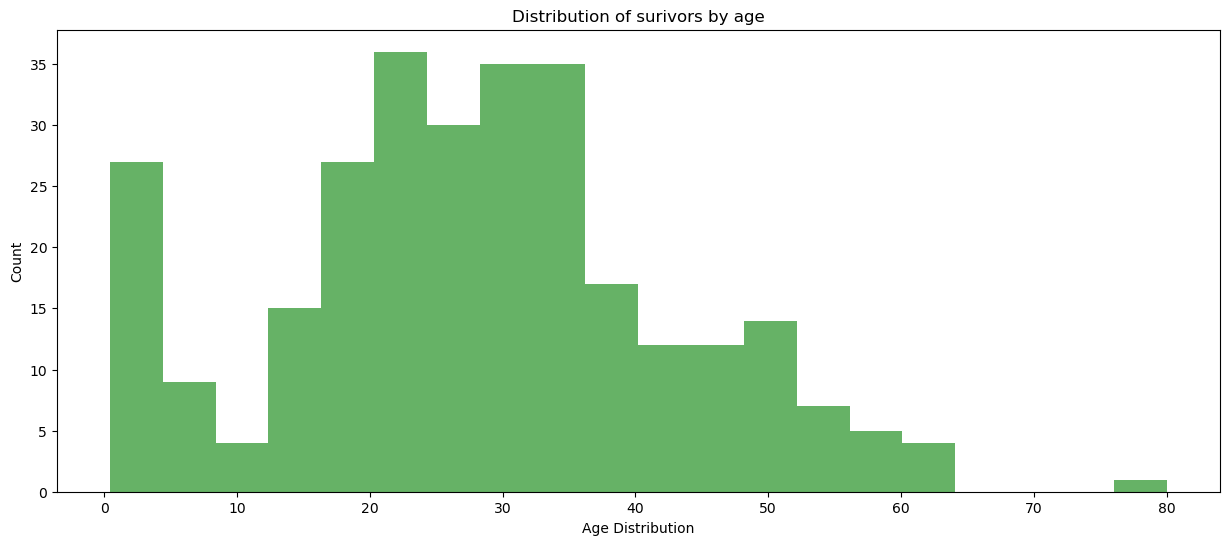

In [98]:
plot_type = input("Which plot do you want to plot in either['countplot' or 'histogram']")
create_plot(plot_type)